In [1]:
library(readr)
library(dplyr, warn.conflicts = FALSE)
library(ggplot2)
library(lubridate, warn.conflicts = FALSE)

In [2]:
download.file(url='http://dvn-vm1.hmdc.harvard.edu/data/mysql/irclog/irclog.tsv', destfile='data/irclog.tsv', method='curl')

In [3]:
df <- read_tsv('data/irclog.tsv')

Parsed with column specification:
cols(
  id = col_double(),
  channel = col_character(),
  day = col_date(format = ""),
  nick = col_character(),
  timestamp = col_double(),
  line = col_character(),
  spam = col_double(),
  in_summary = col_double()
)
Warning message:
“1961 parsing failures.
row  col           expected actual              file
223 line delimiter or quote        'data/irclog.tsv'
223 line delimiter or quote      W 'data/irclog.tsv'
223 line delimiter or quote        'data/irclog.tsv'
223 line delimiter or quote      T 'data/irclog.tsv'
258 line delimiter or quote        'data/irclog.tsv'
... .... .................. ...... .................
See problems(...) for more details.
”

In [4]:
options(dplyr.print_max = 1e9)

In [5]:
out <- df %>%
    filter(!is.na(nick)) %>%
    group_by(month=floor_date(as.Date(day), "month")) %>%
    count()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


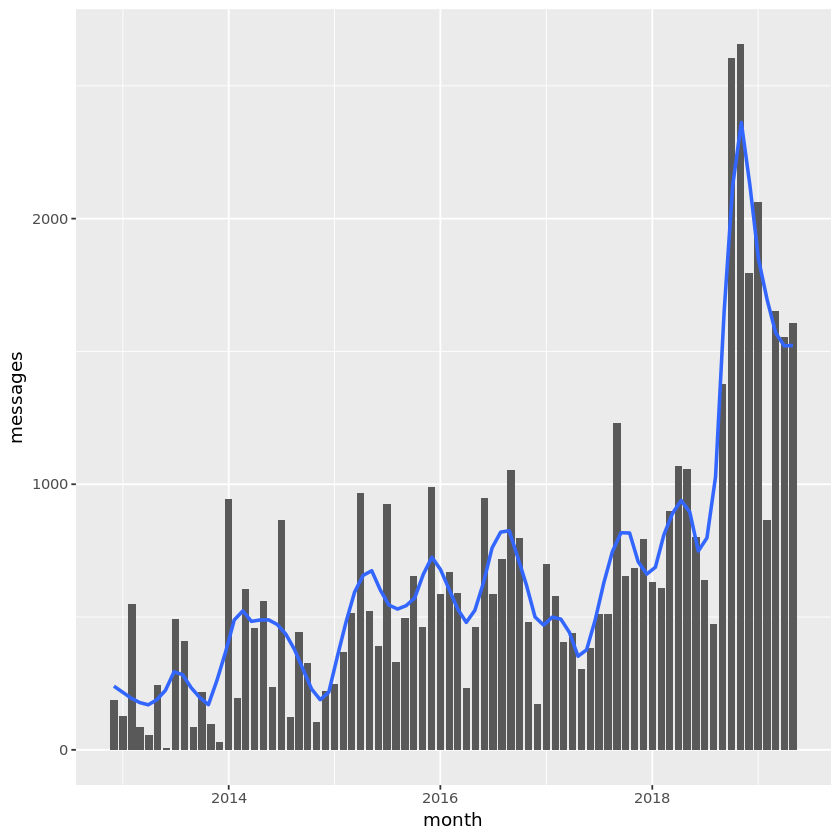

In [15]:
out %>% ggplot(aes(x = month, y = n)) + geom_col() +
geom_smooth(span = .15, se = FALSE) +
ylab("messages") +
xlab("month")

In [11]:
out %>% print(n=80)

# A tibble: 78 x 2
# Groups:   month [78]
   month          n
   <date>     <int>
 1 2012-12-01   188
 2 2013-01-01   129
 3 2013-02-01   550
 4 2013-03-01    85
 5 2013-04-01    55
 6 2013-05-01   244
 7 2013-06-01     5
 8 2013-07-01   494
 9 2013-08-01   411
10 2013-09-01    87
11 2013-10-01   217
12 2013-11-01    97
13 2013-12-01    30
14 2014-01-01   946
15 2014-02-01   196
16 2014-03-01   607
17 2014-04-01   460
18 2014-05-01   561
19 2014-06-01   237
20 2014-07-01   867
21 2014-08-01   122
22 2014-09-01   443
23 2014-10-01   327
24 2014-11-01   103
25 2014-12-01   221
26 2015-01-01   246
27 2015-02-01   370
28 2015-03-01   516
29 2015-04-01   967
30 2015-05-01   522
31 2015-06-01   391
32 2015-07-01   926
33 2015-08-01   330
34 2015-09-01   498
35 2015-10-01   654
36 2015-11-01   464
37 2015-12-01   989
38 2016-01-01   585
39 2016-02-01   668
40 2016-03-01   592
41 2016-04-01   232
42 2016-05-01   464
43 2016-06-01   949
44 2016-07-01   588
45 2016-08-01   719
46 2016-09-01  105

In [12]:
ggsave("irclog.png", width = 7, height = 3)